In [6]:
import numpy as np
from sklearn import preprocessing
import pandas as pd

In [7]:
dataset = pd.read_csv("https://raw.githubusercontent.com/arshell19/datamining/main/heart.csv")

In [8]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
df_without_column_for_convert = pd.DataFrame(dataset, columns = ['age','trestbps','chol','thalach', 'target'])
df_without_column_for_convert.head()

,age,trestbps,chol,thalach,target
0,63,145,233,150,1
1,37,130,250,187,1
2,41,130,204,172,1
3,56,120,236,178,1
4,57,120,354,163,1


In [21]:
df_gender=pd.get_dummies(dataset['sex'])
df_gender

,0,1
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
298,1,0
299,0,1
300,0,1
301,0,1


In [22]:
df_exang=pd.get_dummies(dataset['exang'])
df_exang

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
298,0,1
299,1,0
300,1,0
301,0,1


In [23]:
df_new = pd.concat([df_without_column_for_convert, df_gender,df_exang], axis=1)
df_new.head()

,age,trestbps,chol,thalach,target,0,1,0,1
0,63,145,233,150,1,0,1,1,0
1,37,130,250,187,1,0,1,1,0
2,41,130,204,172,1,1,0,1,0
3,56,120,236,178,1,0,1,1,0
4,57,120,354,163,1,1,0,0,1


In [24]:
df_target = pd.DataFrame(dataset, columns = ['target'])
df_target.head()

,target
0,1
1,1
2,1
3,1
4,1


In [25]:
df_without_target=df_new.drop(['target'], axis=1)

In [26]:
df_new2 = pd.concat([df_without_target,df_target], axis=1)
df_new2

,age,trestbps,chol,thalach,0,1,0,1,target
0,63,145,233,150,0,1,1,0,1
1,37,130,250,187,0,1,1,0,1
2,41,130,204,172,1,0,1,0,1
3,56,120,236,178,0,1,1,0,1
4,57,120,354,163,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,1,0,0,1,0
299,45,110,264,132,0,1,1,0,0
300,68,144,193,141,0,1,1,0,0
301,57,130,131,115,0,1,0,1,0


In [27]:
from sklearn.preprocessing import MinMaxScaler
df_for_minmax_scaler=pd.DataFrame(dataset, columns = ['trestbps', 'chol', 'thalach'])
df_for_minmax_scaler.to_numpy()
scaler = MinMaxScaler()
df_hasil_minmax_scaler=scaler.fit_transform(df_for_minmax_scaler)

In [28]:
df_hasil_minmax_scaler = pd.DataFrame(df_hasil_minmax_scaler,columns = ['trestbps', 'chol', 'thalach'])
df_hasil_minmax_scaler

,trestbps,chol,thalach
0,0.481132,0.244292,0.603053
1,0.339623,0.283105,0.885496
2,0.339623,0.178082,0.770992
3,0.245283,0.251142,0.816794
4,0.245283,0.520548,0.702290
...,...,...,...
298,0.433962,0.262557,0.396947
299,0.150943,0.315068,0.465649
300,0.471698,0.152968,0.534351
301,0.339623,0.011416,0.335878


In [29]:
df_drop_column_for_minmaxscaler=df_new2.drop(['trestbps', 'chol', 'thalach'], axis=1)
df_drop_column_for_minmaxscaler

,age,0,1,0,1,target
0,63,0,1,1,0,1
1,37,0,1,1,0,1
2,41,1,0,1,0,1
3,56,0,1,1,0,1
4,57,1,0,0,1,1
...,...,...,...,...,...,...
298,57,1,0,0,1,0
299,45,0,1,1,0,0
300,68,0,1,1,0,0
301,57,0,1,0,1,0


In [30]:
df_new3 = pd.concat([df_drop_column_for_minmaxscaler,df_hasil_minmax_scaler], axis=1)
df_new3

,age,0,1,0,1,target,trestbps,chol,thalach
0,63,0,1,1,0,1,0.481132,0.244292,0.603053
1,37,0,1,1,0,1,0.339623,0.283105,0.885496
2,41,1,0,1,0,1,0.339623,0.178082,0.770992
3,56,0,1,1,0,1,0.245283,0.251142,0.816794
4,57,1,0,0,1,1,0.245283,0.520548,0.702290
...,...,...,...,...,...,...,...,...,...
298,57,1,0,0,1,0,0.433962,0.262557,0.396947
299,45,0,1,1,0,0,0.150943,0.315068,0.465649
300,68,0,1,1,0,0,0.471698,0.152968,0.534351
301,57,0,1,0,1,0,0.339623,0.011416,0.335878


In [34]:
df_new3_without_target=df_new3.drop(['target'], axis=1)
df_new3_without_target

,age,0,1,0,1,trestbps,chol,thalach
0,63,0,1,1,0,0.481132,0.244292,0.603053
1,37,0,1,1,0,0.339623,0.283105,0.885496
2,41,1,0,1,0,0.339623,0.178082,0.770992
3,56,0,1,1,0,0.245283,0.251142,0.816794
4,57,1,0,0,1,0.245283,0.520548,0.702290
...,...,...,...,...,...,...,...,...
298,57,1,0,0,1,0.433962,0.262557,0.396947
299,45,0,1,1,0,0.150943,0.315068,0.465649
300,68,0,1,1,0,0.471698,0.152968,0.534351
301,57,0,1,0,1,0.339623,0.011416,0.335878


In [35]:
df_new4 = pd.concat([df_new3_without_target,df_target], axis=1)
df_new4

,age,0,1,0,1,trestbps,chol,thalach,target
0,63,0,1,1,0,0.481132,0.244292,0.603053,1
1,37,0,1,1,0,0.339623,0.283105,0.885496,1
2,41,1,0,1,0,0.339623,0.178082,0.770992,1
3,56,0,1,1,0,0.245283,0.251142,0.816794,1
4,57,1,0,0,1,0.245283,0.520548,0.702290,1
...,...,...,...,...,...,...,...,...,...
298,57,1,0,0,1,0.433962,0.262557,0.396947,0
299,45,0,1,1,0,0.150943,0.315068,0.465649,0
300,68,0,1,1,0,0.471698,0.152968,0.534351,0
301,57,0,1,0,1,0.339623,0.011416,0.335878,0


#### Naive Bayes

In [36]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [37]:
X = df_new4.drop(columns=['target']) 
y = df_new4['target'].values

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [39]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[27 17]
 [ 8 39]]
accuracy_Naive Bayes: 0.725
precision_Naive Bayes: 0.725
recall_Naive Bayes: 0.725
f1-score_Naive Bayes : 0.725


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


#### KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

acc_knn = round(neigh.score(X_train, y_train) * 100, 2)
print("Accuracy_KNN :",acc_knn)

Accuracy_KNN : 83.02


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


#### Decision Tree

In [41]:
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics
from matplotlib import pyplot as plt

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [43]:
print("Accuracy_Decision Tree :",metrics.accuracy_score(y_test,y_pred))

Accuracy_Decision Tree : 0.6263736263736264


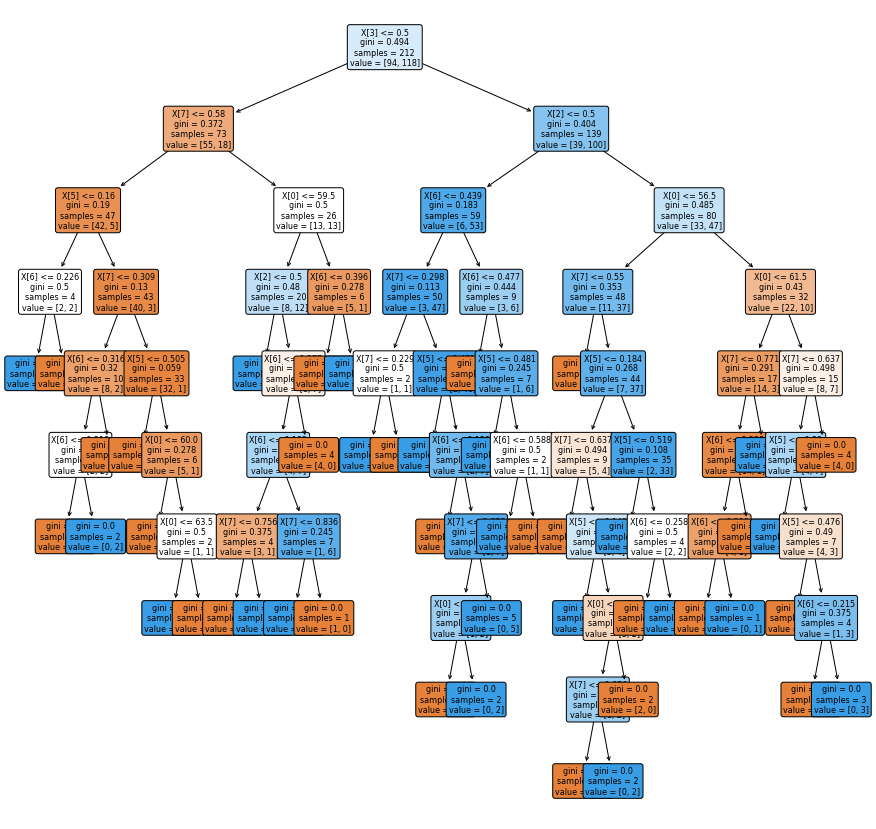

In [44]:
# gambar bentuk decision tree

plt.figure(figsize=(15,15))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()